In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [409]:
def generate_position(distance, node_data):
    array_1_mean = np.mean(node_data['antenna_array_1'])
    array_1_var = np.var(node_data['antenna_array_1'])
    array_2_mean = np.mean(node_data['antenna_array_2'])
    array_2_var = np.var(node_data['antenna_array_2'])
    array_3_mean = np.mean(node_data['antenna_array_3'])
    array_3_var = np.var(node_data['antenna_array_3'])
    array_4_mean = np.mean(node_data['antenna_array_4'])
    array_4_var = np.var(node_data['antenna_array_4'])

    array_1_weight = array_3_var/(array_1_var + array_3_var)
    array_3_weight = array_1_var/(array_1_var + array_3_var)
    array_2_weight = array_4_var/(array_2_var + array_4_var)
    array_4_weight = array_2_var/(array_2_var + array_4_var)

    total_estimate_x = distance*math.tan((array_1_mean*array_1_weight + array_3_mean*array_3_weight)*np.pi/180)
    total_estimate_y = distance*math.tan((array_2_mean*array_2_weight + array_4_mean*array_4_weight)*np.pi/180)

    x_list = []
    y_list = []
    sample_num = len(node_data['antenna_array_1'])
    for i in range(sample_num):
        x_list.append(distance*math.tan((node_data['antenna_array_1'][i]*array_1_weight + node_data['antenna_array_3'][i]*array_3_weight)*np.pi/180))
        y_list.append(distance*math.tan((node_data['antenna_array_2'][i]*array_2_weight + node_data['antenna_array_4'][i]*array_4_weight)*np.pi/180))
    
    return x_list, y_list, total_estimate_x, total_estimate_y


For one node experiment visualization, sometimes one antenna array can't work (Haven't find out why it happens)
But is do not use the data comes from this antenna array, the jointly estimation can work.

The performence in horizontal direction (x) is around 0.1m to 0.2m which is better than vertical direction (y). The vertical error is around from 0.2m to 0.5m.
Maybe the gound cause this problem.

In [410]:
def one_node_visualization(distance, node1_xangle, node1_yangle, node2_xangle, node2_yangle):
    node1_data = pd.read_csv('AoD_experiment_data/one_node_experiment/node1_data_{}_{}.csv'.format(node1_xangle, node1_yangle))

    array_1_angle = node1_data['antenna_array_1']
    array_2_angle = node1_data['antenna_array_2']
    array_3_angle = node1_data['antenna_array_3']
    array_4_angle = node1_data['antenna_array_4']

    array_1_est_x = []
    array_2_est_y = []
    array_3_est_x = []
    array_4_est_y = []

    for i in range(len(array_1_angle)):
        #if array_1_angle[i] > 80 or array_1_angle[i] < -80:
        #    array_1_angle[i] = array_3_angle[i]
        array_1_est_x.append(distance*math.tan(array_1_angle[i]*np.pi/180))
        #if array_2_angle[i] > 80 or array_2_angle[i] < -80:
        #    array_2_angle[i] = array_4_angle[i]
        array_2_est_y.append(distance*math.tan(array_2_angle[i]*np.pi/180))
        #if array_3_angle[i] > 80 or array_3_angle[i] < -80:
        #    array_3_angle[i] = array_1_angle[i]
        array_3_est_x.append(distance*math.tan(array_3_angle[i]*np.pi/180))
        #if array_4_angle[i] > 80 or array_4_angle[i] < -80:
        #    array_4_angle[i] = array_2_angle[i]
        array_4_est_y.append(distance*math.tan(array_4_angle[i]*np.pi/180))

    node_1_x, node_1_y, node_1_estimate_x, node_1_estimate_y = generate_position(distance, node1_data)

    #plt.scatter(array_1_est_x, array_2_est_y, color = 'r', label='est according 1 and 2')
    #plt.scatter(array_1_est_x, array_4_est_y, color = 'b', label='est according 1 and 4')
    plt.scatter(array_3_est_x, array_2_est_y, color = 'g', label='est according 3 and 2')
    plt.scatter(array_3_est_x, array_4_est_y, color = 'y', label='est according 3 and 4')
    plt.scatter(node_1_estimate_x, node_1_estimate_y, color = 'k', label='total estimation')

    node1_xangle = node1_xangle*math.pi/180
    node1_yangle = node1_yangle*math.pi/180

    node_1_true_x = distance*math.tan(node1_xangle)
    node_1_true_y = distance*math.tan(node1_yangle)

    for i in range(len(node_1_x)):
        plt.scatter(node_1_x[i], node_1_y[i], color='r', marker = 'x')
        plt.plot([node_1_x[i], node_1_true_x], [node_1_y[i], node_1_true_y], color='r', linestyle='--')

    #plt.xlim(-2*distance, 2*distance)
    #plt.ylim(-2*distance,2*distance)
    plt.legend()
    plt.grid()
    plt.show()
    
    return

In [411]:
def two_node_visualization(distance, node1_xangle, node1_yangle, node2_xangle, node2_yangle):
    node1_data = pd.read_csv('AoD_experiment_data/two_node_experiment/node1_data_{}_{}.csv'.format(node1_xangle, node1_yangle))
    node2_data = pd.read_csv('AoD_experiment_data/two_node_experiment/node2_data_{}_{}.csv'.format(node2_xangle, node2_yangle))
    
    node_1_x, node_1_y, node_1_estimate_x, node_1_estimate_y = generate_position(distance, node1_data)
    node_2_x, node_2_y, node_2_estimate_x, node_2_estimate_y = generate_position(distance, node2_data)

    node1_xangle = node1_xangle*math.pi/180
    node1_yangle = node1_yangle*math.pi/180
    node2_xangle = node2_xangle*math.pi/180
    node2_yangle = node2_yangle*math.pi/180

    node_1_true_x = distance*math.tan(node1_xangle)
    node_1_true_y = distance*math.tan(node1_yangle)

    node_2_true_x = distance*math.tan(node2_xangle)
    node_2_true_y = distance*math.tan(node2_yangle)

    plt.scatter(node_1_true_x, node_1_true_y, color='r', label='node1 true position')
    plt.scatter(node_2_true_x, node_2_true_y, color='b', label='node2 true position')

    plt.plot([node_1_true_x, node_1_estimate_x], [node_1_true_y, node_1_estimate_y], color = 'g', linestyle=':')
    plt.plot([node_2_true_x, node_2_estimate_x], [node_2_true_y, node_2_estimate_y], color = 'g', linestyle=':')
    for i in range(len(node_1_x)):
        plt.scatter(node_1_x[i], node_1_y[i], color='r', marker = 'x')
        plt.plot([node_1_x[i], node_1_true_x], [node_1_y[i], node_1_true_y], color='r', linestyle='--')

    for i in range(len(node_2_x)):
        plt.scatter(node_2_x[i], node_2_y[i], color='b', marker = 'x')
        plt.plot([node_2_x[i], node_2_true_x], [node_2_y[i], node_2_true_y], color='b', linestyle='--')

    plt.scatter(node_1_estimate_x, node_1_estimate_y, color='black', marker = '*', label='node1 estimate position', s = 50)
    plt.scatter(node_2_estimate_x, node_2_estimate_y, color='black', marker = '*', label='node2 estimate position', s = 50)

    plt.legend()
    plt.grid()
    plt.show()

    fig, axs = plt.subplots(2, 4, figsize=(15, 10))
    for i in range(4):
        data = node1_data['antenna_array_{}'.format(i+1)]
        mu, std = np.mean(data), np.std(data)
        count, bins, ignored = axs[0, i].hist(data, bins=30, density=False, alpha=1, color='g', label=f'node1_antenna_array_{i+1}')
        axs[0, i].set_xlim(-90, 90)
        x = np.linspace(-90, 90, 1000)
        p = np.exp(-((x - mu) ** 2) / (2 * std ** 2)) / (std * np.sqrt(2 * np.pi))
        axs[0, i].plot(x, p, 'k', linewidth=2)
        axs[0, i].set_title(f'Node1 Antenna Array {i+1}')
        axs[0, i].legend()

    for i in range(4):
        data = node2_data['antenna_array_{}'.format(i+1)]
        mu, std = np.mean(data), np.std(data)
        count, bins, ignored = axs[1, i].hist(data, bins=30, density=False, alpha=1, color='g', label=f'node2_antenna_array_{i+1}')
        axs[1, i].set_xlim(-90, 90)
        x = np.linspace(-90, 90, 1000)
        p = np.exp(-((x - mu) ** 2) / (2 * std ** 2)) / (std * np.sqrt(2 * np.pi))
        axs[1, i].plot(x, p, 'k', linewidth=2)
        axs[1, i].set_title(f'Node2 Antenna Array {i}')
        axs[1, i].legend()

    plt.tight_layout()
    plt.grid()
    plt.show()
    return

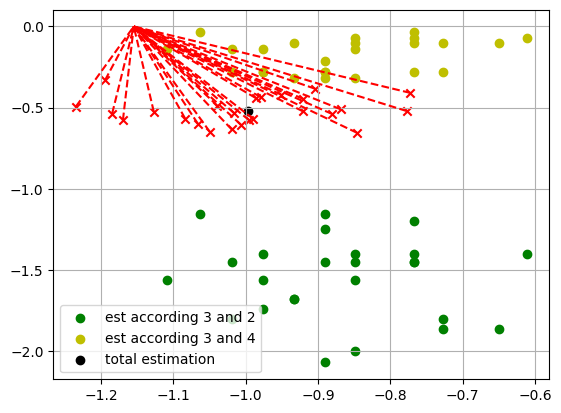

In [412]:
experiment_type = input("Please input the experiment type: ")
if experiment_type == "1":
    one_node_visualization(2, -30, 0, 48, 27)
elif experiment_type == "2":
    two_node_visualization(0.27, 14, 32, 48, 27)